# Project workflow:
1. Loading the data
2. Exploratory Data Analysis
3. Datapreprocessing, Feature Selection
4. Model building
5. Hyperparameter Tuning
6. Explainable AI

## Exploratory Data Analysis

1. Checking the shape of the data
2. Checking the columns of the data
3. Checking the datatypes
4. Looking for missing values
5. Putting it all together
6. Looking for duplicates
7. Statistical description of the data

### importing the necessary libraries

In [1]:
# for ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

# for data analysis 
import pandas as pd
import numpy as np


#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

#for categorical encoding
from sklearn.preprocessing import LabelEncoder

#for feature scaling
from sklearn.preprocessing import MinMaxScaler

#for handling class imbalance
from collections import Counter
from imblearn.over_sampling import SMOTE

#for splitting the data & model building
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.naive_bayes import GaussianNB


#metrics for evaluating the model performance
from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)


# for hyperparameter tuning

from sklearn.model_selection import  GridSearchCV,cross_val_score, StratifiedKFold, KFold


# for saving the model
import joblib 




In [2]:
#displaying all the features
pd.options.display.max_columns = None


# loading the data into pandas dataframe
road_traf=pd.read_csv("D:/TMLC_Projects/Road_Traffic_Severity_Classification/Dataset/RTA Dataset.csv")

In [3]:
# basic checks

road_traf.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
# displaying the last five records
road_traf.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,No defect,Outside rural areas,Undivided Two way,Tangent road with mountainous terrain and,O Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [5]:
# checking the size of data
road_traf.shape

(12316, 32)

from the above output, the dataset contains 12316 rows and 32 features.

In [6]:
# finding the all feature names
road_traf.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [7]:
# finding the datatype of all features
road_traf.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [8]:
# converting the time feature into datetime
road_traf['Time'] = pd.to_datetime(road_traf['Time'])

In [9]:
# extracting hour and minute from timestamp
road_traf['hour'] = road_traf['Time'].dt.hour
road_traf['minute'] = road_traf['Time'].dt.minute
road_traf.drop('Time', axis=1, inplace=True)

In [10]:
road_traf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           12316 non-null  object
 2   Sex_of_driver                12316 non-null  object
 3   Educational_level            11575 non-null  object
 4   Vehicle_driver_relation      11737 non-null  object
 5   Driving_experience           11487 non-null  object
 6   Type_of_vehicle              11366 non-null  object
 7   Owner_of_vehicle             11834 non-null  object
 8   Service_year_of_vehicle      8388 non-null   object
 9   Defect_of_vehicle            7889 non-null   object
 10  Area_accident_occured        12077 non-null  object
 11  Lanes_or_Medians             11931 non-null  object
 12  Road_allignment              12174 non-null  object
 13  Types_of_Junction            11

In [11]:
# checking for statistical information

road_traf.describe()

,Number_of_vehicles_involved,Number_of_casualties,hour,minute
count,12316.000000,12316.000000,12316.000000,12316.000000
mean,2.040679,1.548149,13.835823,27.696736
std,0.688790,1.007179,5.202923,17.482604
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,10.000000,12.000000
50%,2.000000,1.000000,15.000000,30.000000
75%,2.000000,2.000000,18.000000,43.000000
max,7.000000,8.000000,23.000000,59.000000


In [12]:
# checking the statistical information of categorical features
road_traf.describe(include='object').T

,count,unique,top,freq
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883
Defect_of_vehicle,7889,3,No defect,7777


In [13]:
# checking for duplicate values
road_traf.duplicated().sum()

0

There are no duplicate values present in the data.

In [14]:
# checking for missing values
m=road_traf.isnull().sum()/road_traf.shape[0]
m

Day_of_week                    0.000000
Age_band_of_driver             0.000000
Sex_of_driver                  0.000000
Educational_level              0.060166
Vehicle_driver_relation        0.047012
Driving_experience             0.067311
Type_of_vehicle                0.077135
Owner_of_vehicle               0.039136
Service_year_of_vehicle        0.318935
Defect_of_vehicle              0.359451
Area_accident_occured          0.019406
Lanes_or_Medians               0.031260
Road_allignment                0.011530
Types_of_Junction              0.072020
Road_surface_type              0.013966
Road_surface_conditions        0.000000
Light_conditions               0.000000
Weather_conditions             0.000000
Type_of_collision              0.012585
Number_of_vehicles_involved    0.000000
Number_of_casualties           0.000000
Vehicle_movement               0.025008
Casualty_class                 0.000000
Sex_of_casualty                0.000000
Age_band_of_casualty           0.000000


from the above output , it is clear that some features have missing values. 
lets handle the missing value imputation in later part.

In [15]:
categ=[col for col in road_traf.columns if road_traf[col].dtype=='O']


for col in categ:
    print(road_traf[col].value_counts())

    print('______________________________')

Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: Day_of_week, dtype: int64
______________________________
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: Age_band_of_driver, dtype: int64
______________________________
Male       11437
Female       701
Unknown      178
Name: Sex_of_driver, dtype: int64
______________________________
Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: Educational_level, dtype: int64
______________________________
Employee    9627
Owner       1973
Other        123
Unknown       14
Name: Vehicle_driver_relation, dtype: int64
______________________________
5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: 

In [16]:
road_traf.isnull().sum()

Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality        

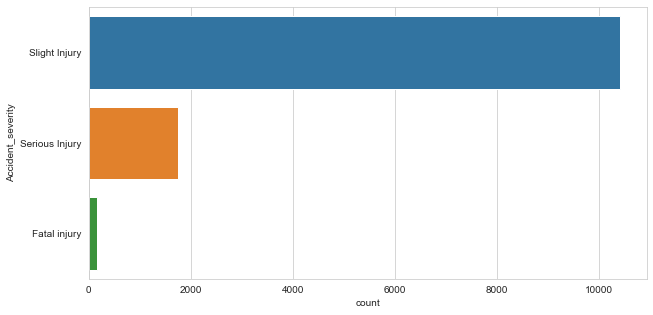

In [17]:
 # checking the values in the accident_severity feature
road_traf['Accident_severity'].value_counts()

# checking the distribution of accident_severity feature
plt.figure(figsize=(10,5))
sns.countplot(y='Accident_severity',data=road_traf)
plt.show()

there is a huge variation among the distribution of classes in the target feature.
from the above plot it is observed that the count of slight injury is more compared to other classes.


## Analysing the numerical features

In [18]:
def findoutliers(column):
    
    
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
    return np.array(outliers)

In [19]:
# defining the function for plotting the distribution and box plot of numerical features and oultiers count


def plot_continous_num_features(column):
    
    """Function to plot continous features distribution
    
    Inputs:
    
        col : str
            List of plots to be plotted for feature
        
    
    """
    fix, (ax1,ax2) =plt.subplots(1,2,figsize=(8,5))
    sns.boxplot(column, orient='v',ax=ax1)
    ax1.set_ylabel=column.name
    ax1.set_title('Box plot of {}'.format(column.name))
    sns.distplot(column,ax=ax2) 
    ax2.set_title('Distribution plot of {}'.format(column.name))
    plt.tight_layout()
    
    
    print('count of outlier ', len(findoutliers(column)))
    print('Mean ',format(column.mean()))
    print('Median ',format(column.median()))
    print('Missing values',format(column.isnull().sum()))
    print('% of Missing values',format(round(100*(column.isnull().sum()/len(column)),2)))

In [20]:
num=[i for i in road_traf.columns if road_traf[i].dtypes!='O']
num

['Number_of_vehicles_involved', 'Number_of_casualties', 'hour', 'minute']

count of outlier  3976
Mean  2.0406787918155245
Median  2.0
Missing values 0
% of Missing values 0.0


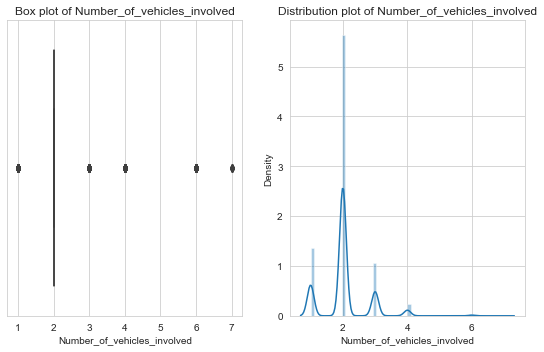

In [21]:
plot_continous_num_features(road_traf['Number_of_vehicles_involved'])

count of outlier  720
Mean  1.548148749594024
Median  1.0
Missing values 0
% of Missing values 0.0


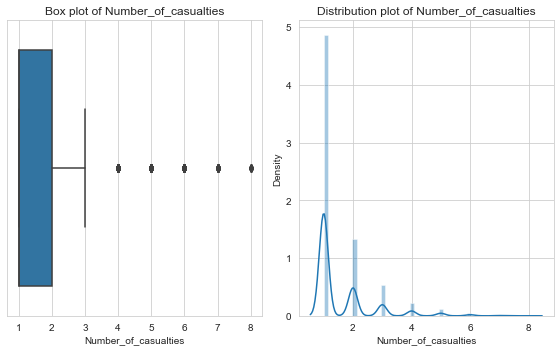

In [22]:
plot_continous_num_features(road_traf['Number_of_casualties'])

count of outlier  0
Mean  13.8358233192595
Median  15.0
Missing values 0
% of Missing values 0.0


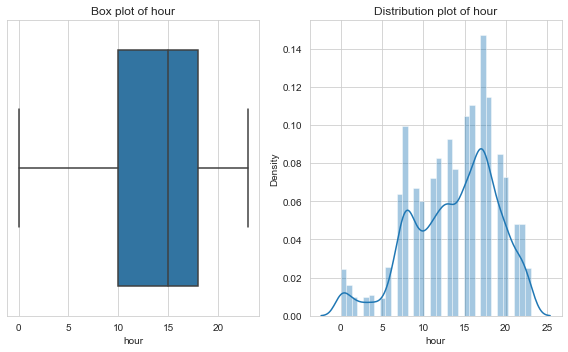

In [23]:
plot_continous_num_features(road_traf['hour'])

count of outlier  0
Mean  27.69673595323157
Median  30.0
Missing values 0
% of Missing values 0.0


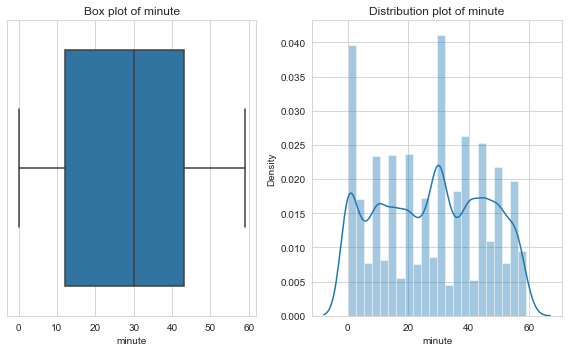

In [24]:
plot_continous_num_features(road_traf['minute'])

observations:
1. The more no.of vehicles involved are 2.
2. The no.of casualities mostly are 1&2.
3. Most of the 

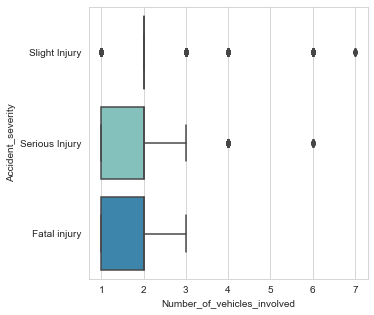

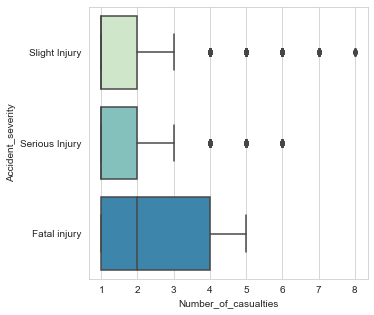

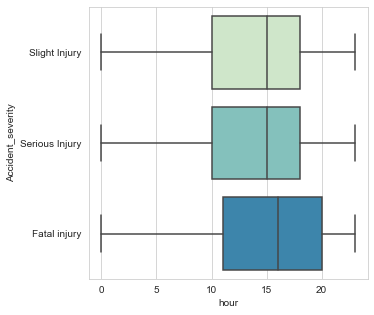

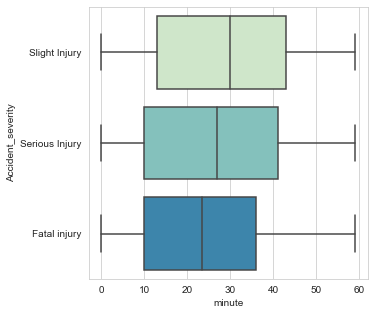

In [25]:
# Analysing the numerical columns with target feature


num=['Number_of_vehicles_involved','Number_of_casualties','hour','minute']
for i in range(len(num)):
    n=num[i]
    plt.figure(figsize=(5,5))
    sns.boxplot(x=n,y='Accident_severity',data=road_traf,palette='GnBu')

###  Analysing the categorical features

In [26]:
#checking the count of different categoricl features

categ=[col for col in road_traf.columns if road_traf[col].dtype=='O']


for col in categ:
    print(road_traf[col].value_counts())
    print('______________________________')

Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: Day_of_week, dtype: int64
______________________________
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: Age_band_of_driver, dtype: int64
______________________________
Male       11437
Female       701
Unknown      178
Name: Sex_of_driver, dtype: int64
______________________________
Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: Educational_level, dtype: int64
______________________________
Employee    9627
Owner       1973
Other        123
Unknown       14
Name: Vehicle_driver_relation, dtype: int64
______________________________
5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: 

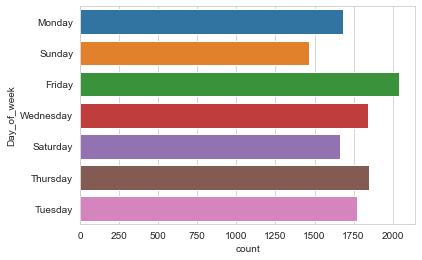

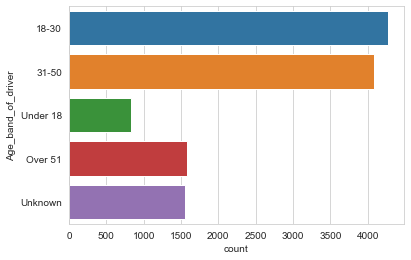

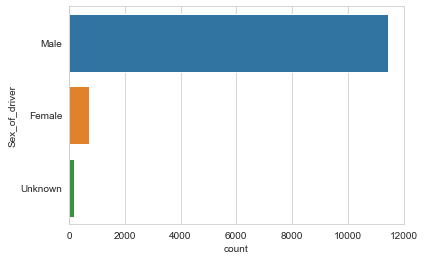

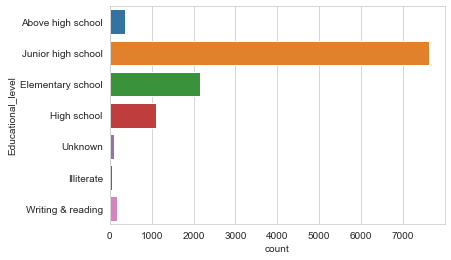

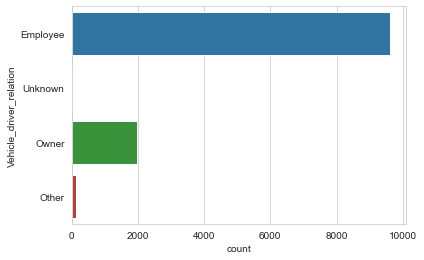

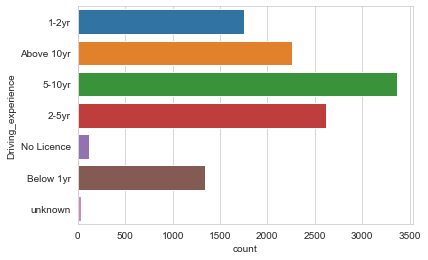

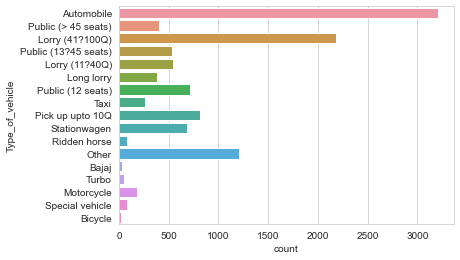

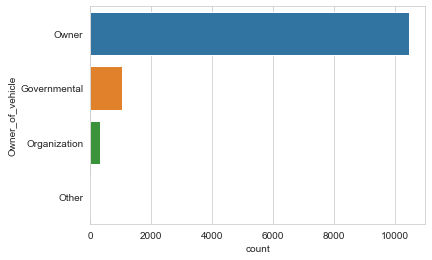

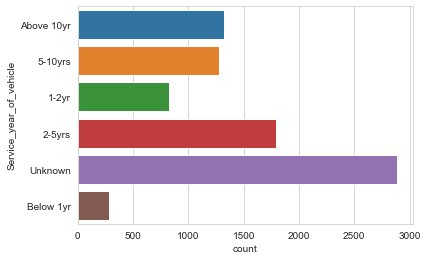

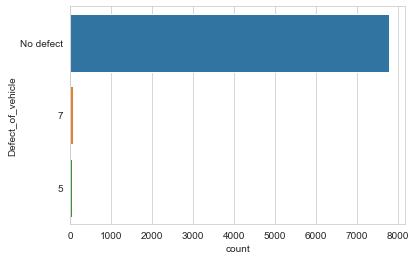

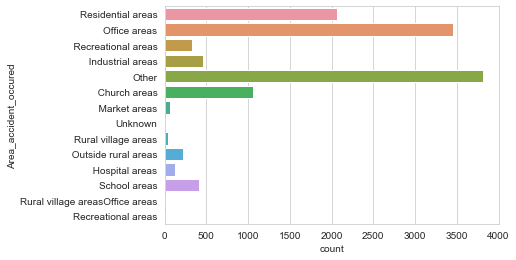

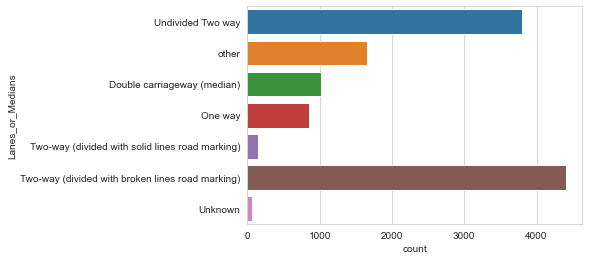

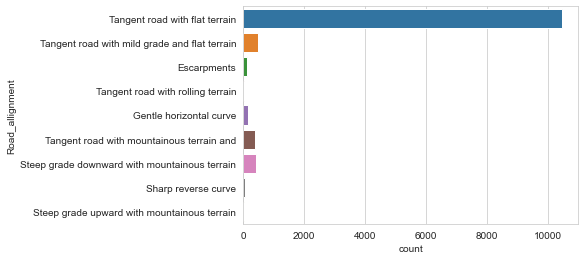

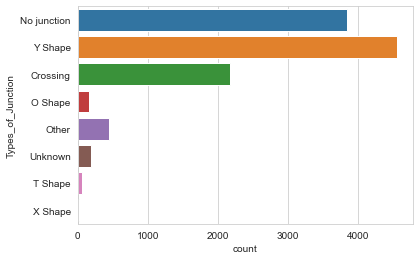

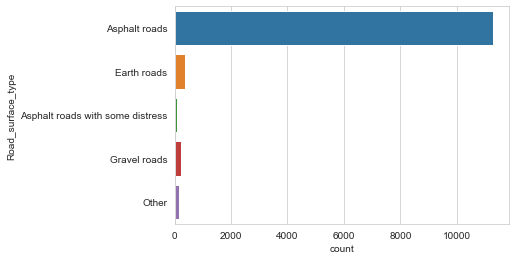

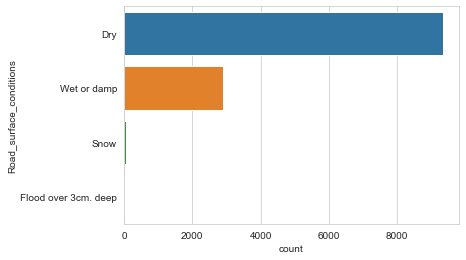

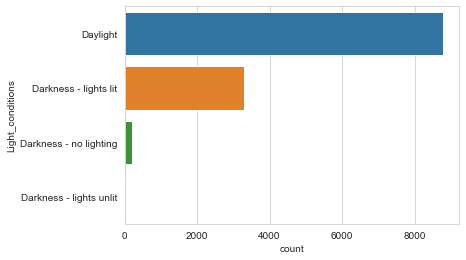

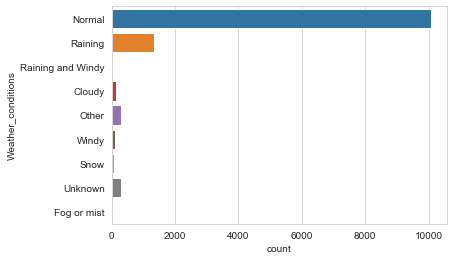

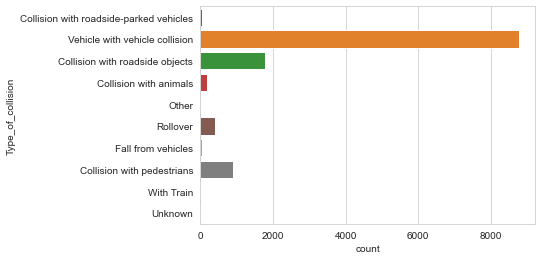

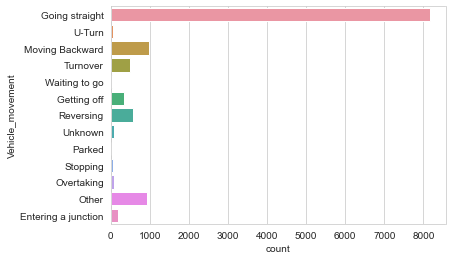

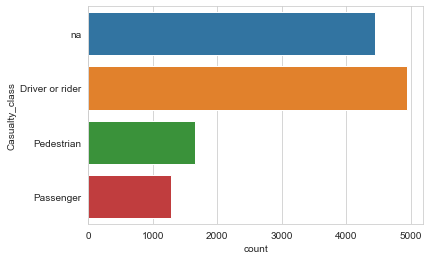

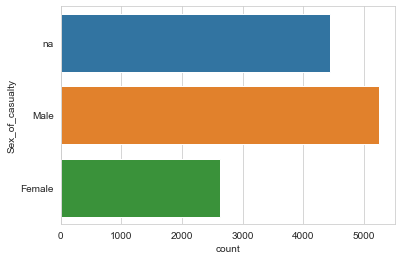

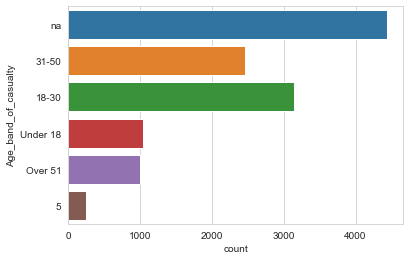

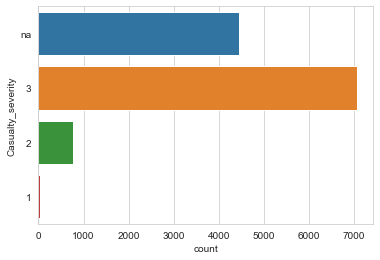

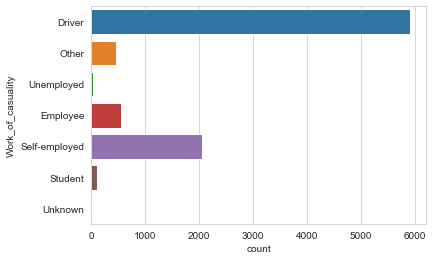

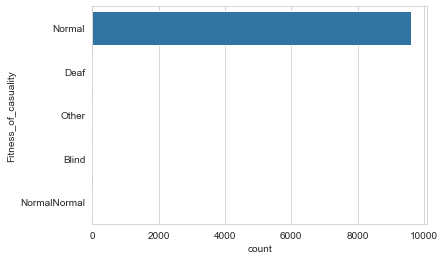

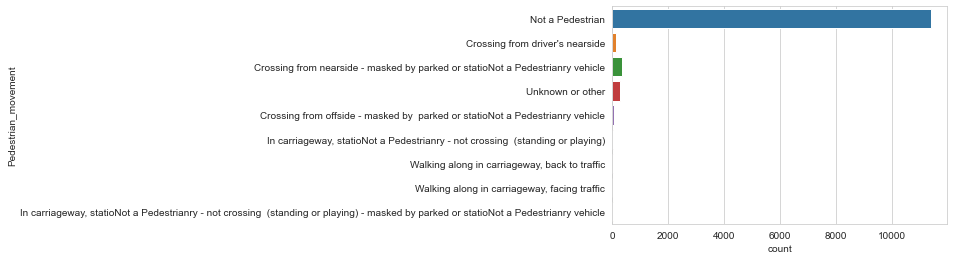

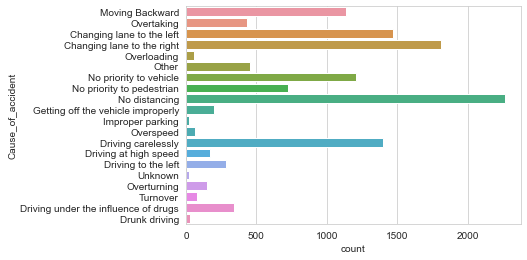

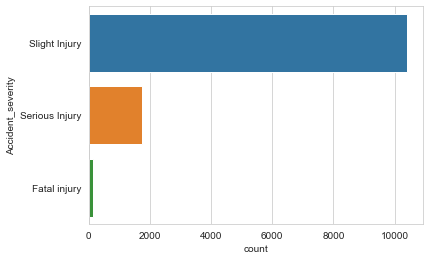

In [27]:
for col in road_traf.select_dtypes(include='object'):
    
        sns.countplot(y=col, data=road_traf)
        plt.show()

### Analysing the categorical features with target feature

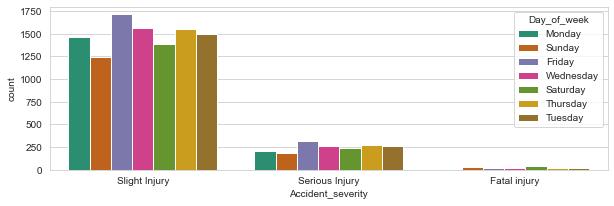

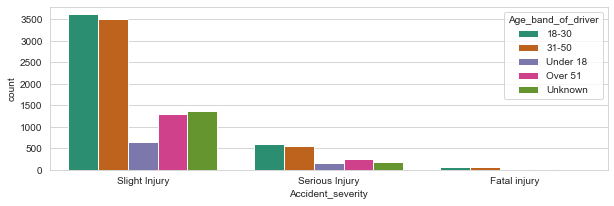

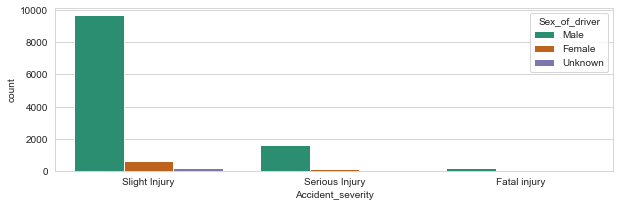

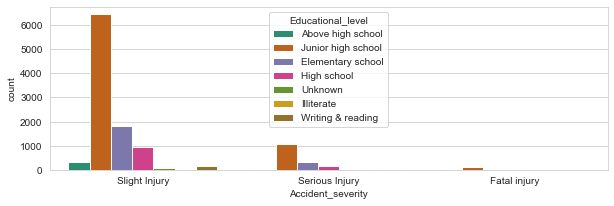

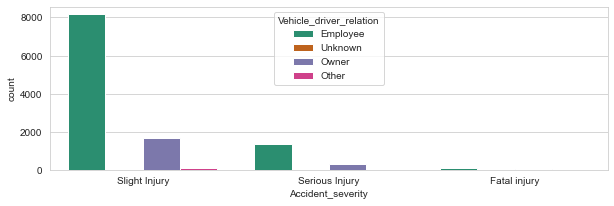

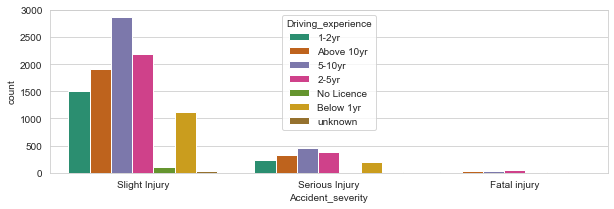

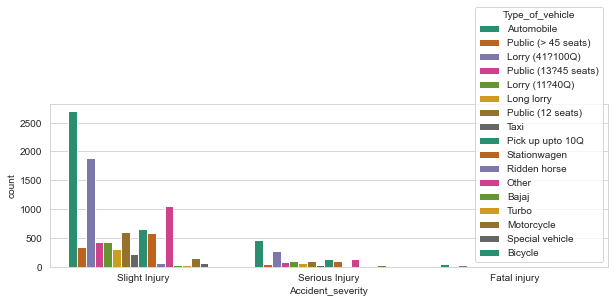

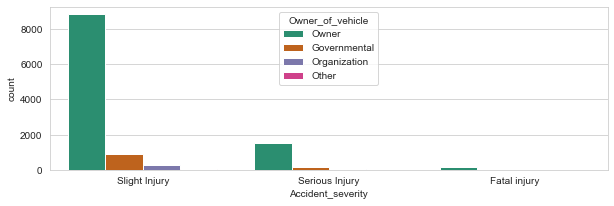

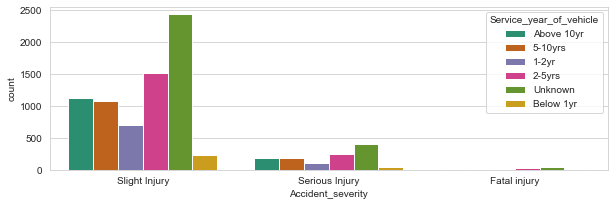

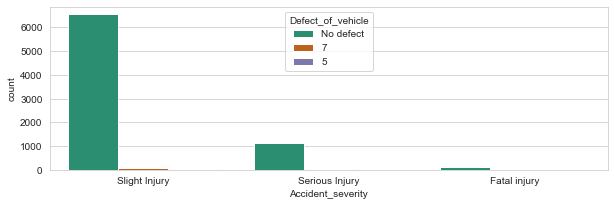

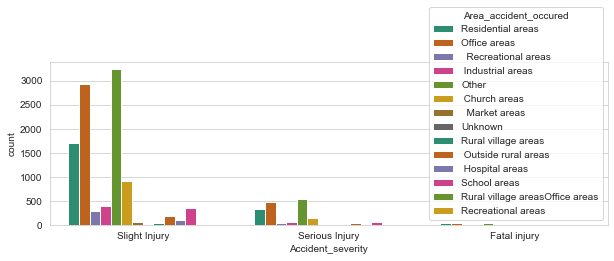

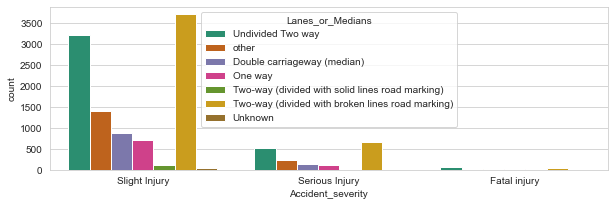

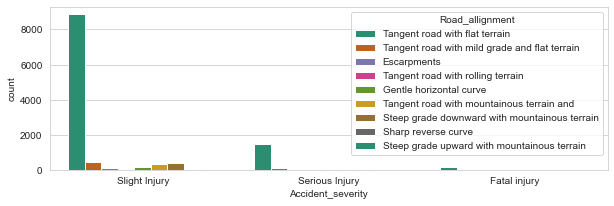

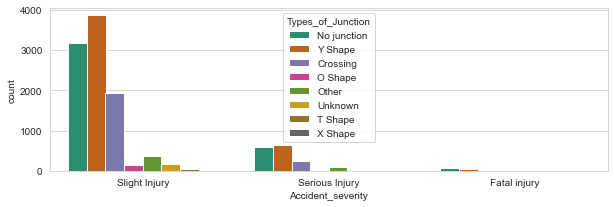

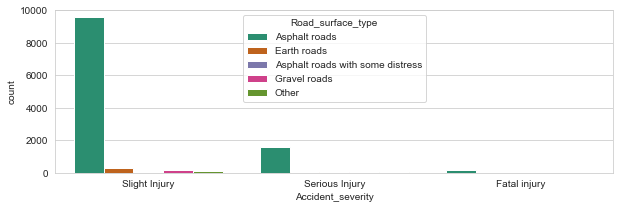

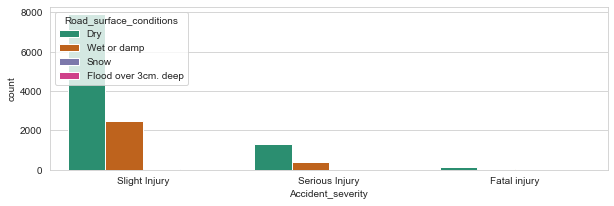

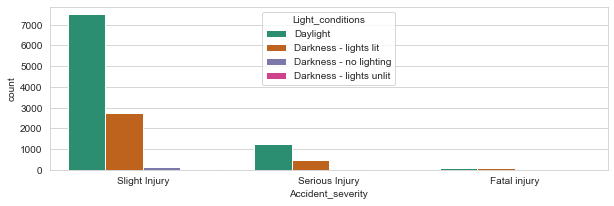

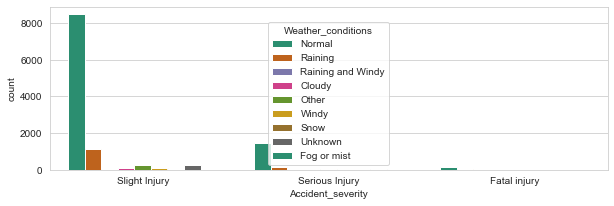

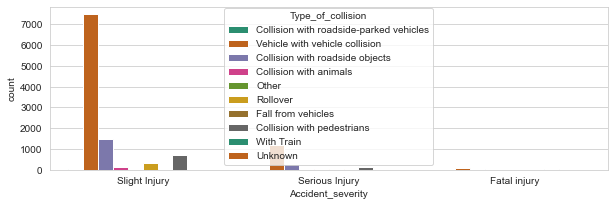

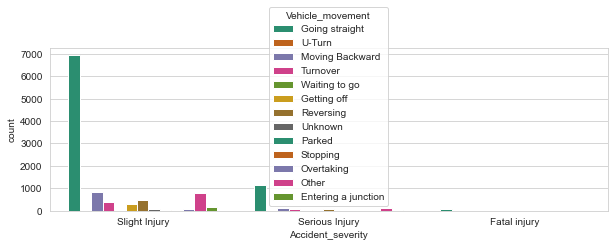

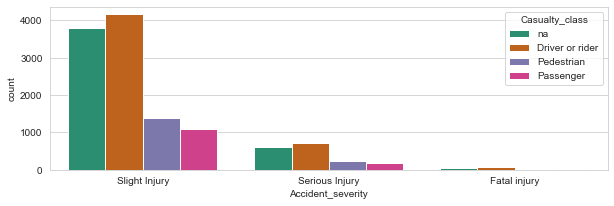

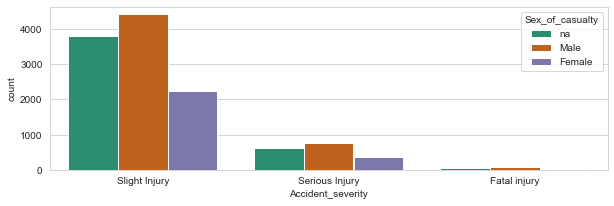

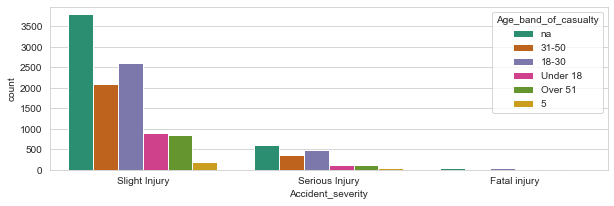

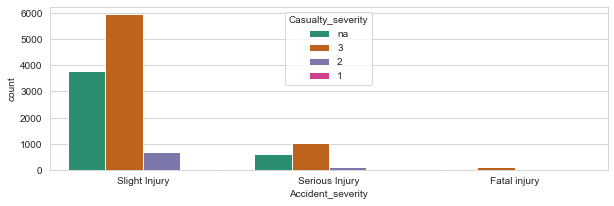

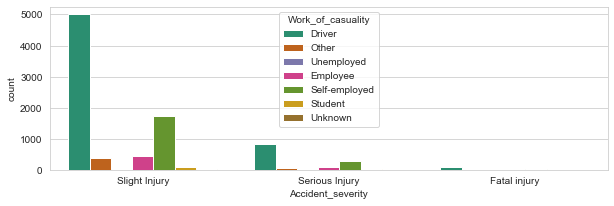

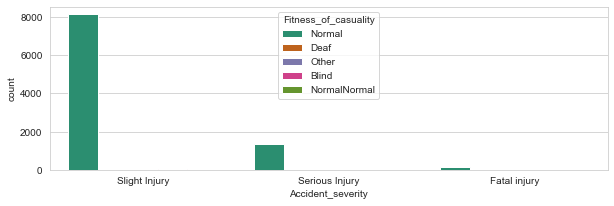

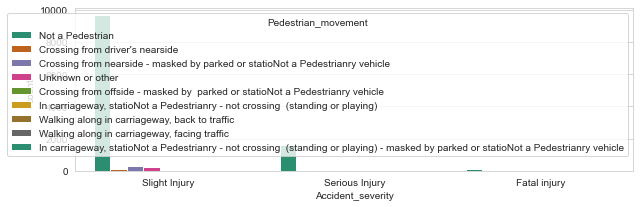

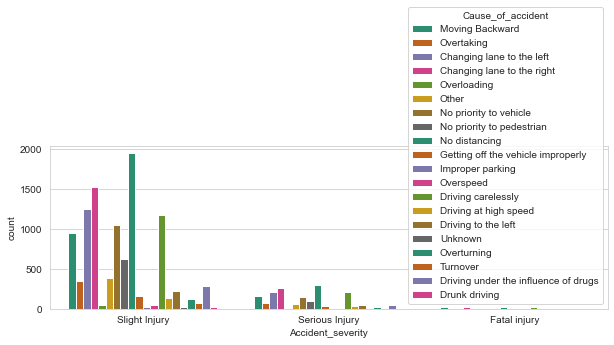

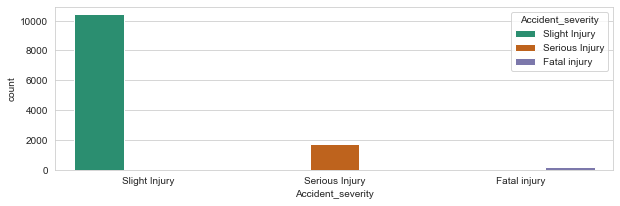

In [28]:
for c in categ:
    plt.figure(figsize=(10,3))
    sns.countplot(x='Accident_severity',hue=c,data=road_traf, palette = 'Dark2')

## Data Preprocessing




In [29]:
# handling the missing values

# dropping the columns having missing values above 10%

road_traf.drop(m[m>0.1].index.tolist(),axis=1,inplace=True)


In [30]:
# imputing the columns having  missing values (<10%) with mode
impute_cols = [x for x in  m[(m!= 0) & (m<=0.1)].index.tolist()]
for feat in impute_cols:
    mode = road_traf[feat].mode()[0]
    road_traf[feat].fillna(mode, inplace=True)


In [31]:
#checking for missing values after handling .

road_traf.isnull().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
hour                           0
minute                         0
dtype: int64

In [32]:
# handling the outliers
from scipy import stats

stats.boxcox(road_traf['Number_of_casualties'])


(array([0.33112126, 0.33112126, 0.33112126, ..., 0.        , 0.        ,
        0.        ]),
 -2.477944175173485)

(array([8.397e+03, 2.290e+03, 9.090e+02, 0.000e+00, 3.940e+02, 2.070e+02,
        0.000e+00, 8.900e+01, 2.200e+01, 8.000e+00]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

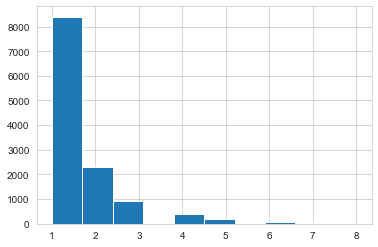

In [33]:
plt.hist(road_traf['Number_of_casualties'])


(array([ 424.,  175.,  290., 1919., 1103., 1463., 2434., 2184., 1312.,
        1012.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

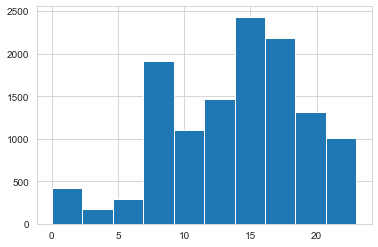

In [34]:
np.log(road_traf['hour'])
plt.hist(road_traf['hour'])

(array([1871., 1113., 1065., 1041.,  928., 1951., 1129., 1159., 1091.,
         968.]),
 array([ 0. ,  5.9, 11.8, 17.7, 23.6, 29.5, 35.4, 41.3, 47.2, 53.1, 59. ]),
 <a list of 10 Patch objects>)

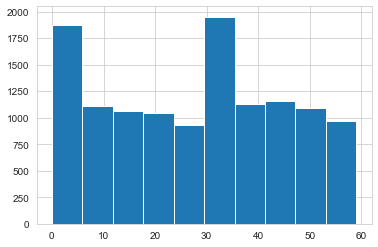

In [35]:
np.log(road_traf['minute'])
plt.hist(road_traf['minute'])

In [36]:
# categorical encoding using 
def ordinal_encoder(road_traf, feats): 
    for feat in feats:    
        feat_val = list(1+np.arange(road_traf[feat].nunique()))
        feat_key = list(road_traf[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        road_traf[feat] = road_traf[feat].map(feat_dict)
    return road_traf

road_traf = ordinal_encoder(road_traf,road_traf.drop(['Accident_severity'],axis=1).columns)
road_traf.shape

(12316, 29)

## Feature Selection


In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


X=road_traf.loc[:,(road_traf.dtypes!='object').values]
y=road_traf['Accident_severity']

bestfeatures=SelectKBest(score_func=f_classif,k=10)
features=bestfeatures.fit(X,y)


print("Shape of X :", X.shape)
print("Shape of y:", y.shape)

dfscores=pd.DataFrame(features.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank
print(features_rank.nlargest(20,'Score'))  
  


Shape of X : (12316, 28)
Shape of y: (12316,)
                              0      Score
17  Number_of_vehicles_involved  63.424381
18         Number_of_casualties  50.090592
14             Light_conditions  10.000568
27                       minute   6.257259
16            Type_of_collision   4.351236
22         Age_band_of_casualty   4.015295
1            Age_band_of_driver   3.222919
26                         hour   3.171884
5            Driving_experience   2.862727
8         Area_accident_occured   2.109918
7              Owner_of_vehicle   1.931396
9              Lanes_or_Medians   1.641159
4       Vehicle_driver_relation   1.623274
20               Casualty_class   1.319533
12            Road_surface_type   1.282815
24          Pedestrian_movement   1.203636
15           Weather_conditions   1.056688
2                 Sex_of_driver   0.985358
19             Vehicle_movement   0.744709
23            Casualty_severity   0.673131


In [38]:
# defining the input features 
X_new=road_traf[['hour','Day_of_week','Number_of_casualties','Cause_of_accident','Number_of_vehicles_involved','Type_of_vehicle','Light_conditions','Type_of_collision','Age_band_of_driver','Driving_experience','Area_accident_occured','Lanes_or_Medians']]
y_new=road_traf['Accident_severity']

print("Shape of X_new:",X_new.shape)
print("Shape of y_new:",y_new.shape)

Shape of X_new: (12316, 12)
Shape of y_new: (12316,)


## splitting the data

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=42)
print("Shape of X_train:",X_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8621, 12)
Shape of y_train: (8621,)
Shape of X_test: (3695, 12)
Shape of y_test: (3695,)


In [40]:
y_train.values

array(['Slight Injury', 'Serious Injury', 'Serious Injury', ...,
       'Slight Injury', 'Slight Injury', 'Slight Injury'], dtype=object)

## Handling class imbalance problem

In [41]:

counter=Counter(y_train)


print("Before smothe:")
for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")
    

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)






Before smothe:
Class= Slight Injury, n=7324 (84.96%)
Class= Serious Injury, n=1191 (13.82%)
Class= Fatal injury, n=106 (1.23%)


In [42]:
print("After smothe:")

counter=Counter(y_train)
for k,v in counter.items():
    per = 100*v/len(y_train.values)
    print(f"Class = {k}, n={v} ({per:.2f}%)")

After smothe:
Class = Slight Injury, n=7324 (33.33%)
Class = Serious Injury, n=7324 (33.33%)
Class = Fatal injury, n=7324 (33.33%)


## Feature Scaling 

In [44]:
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()

# transform training data
X_train_norm = norm.fit_transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

## Modelling

In [45]:
model_list=[]
accuracy=[]
F1_Score=[]
precision=[]
recall=[]
cm=[]

model_list.append(SVC())
model_list.append(KNeighborsClassifier())
model_list.append(DecisionTreeClassifier())
model_list.append(ExtraTreesClassifier())
model_list.append(RandomForestClassifier())
model_list.append(GaussianNB())
model_list.append(XGBClassifier())



In [46]:
for model in model_list:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred))
    precision.append(precision_score(y_test,y_pred,average='weighted'))
    recall.append(recall_score(y_test,y_pred,average='weighted'))
    cm.append(confusion_matrix(y_test,y_pred))
    F1_Score.append(f1_score(y_test,y_pred,average='weighted'))

[15:26:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [47]:
# showing the metrics
models=['SVC','KNN','DecisionTreeClassifier','ExtraTreesClassifier','RandomForestClassifier','GaussianNB','XGBClassifier']
data_zipped=zip(models,accuracy,precision,recall,F1_Score)
metrics=pd.DataFrame(data=data_zipped,columns=['Model_name','Accuracy','Precision','Recall','F1_score'])
metrics

,Model_name,Accuracy,Precision,Recall,F1_score
0,SVC,0.546143,0.738946,0.546143,0.619335
1,KNN,0.524222,0.739670,0.524222,0.599185
2,DecisionTreeClassifier,0.668471,0.751474,0.668471,0.703134
3,ExtraTreesClassifier,0.783221,0.758164,0.783221,0.769384
4,RandomForestClassifier,0.771313,0.759046,0.771313,0.764948
5,GaussianNB,0.479296,0.743869,0.479296,0.565312
6,XGBClassifier,0.743708,0.755104,0.743708,0.749228


## hyperparameter tuning

In [48]:
# 1st attempt

gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

# A parameter grid for XGBoost
params = {
    'n_estimators': range(100, 500, 100),
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

extree_estimator = ExtraTreesClassifier()

gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    cv=gkf,
)

extree_model = gsearch.fit(X=X_train, y=y_train)
(gsearch.best_params_, gsearch.best_score_)

({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 3,
  'n_estimators': 100},
 0.8201396551485862)

In [49]:
#2nd attempt

gkf2 = KFold(n_splits=3, shuffle=True, random_state=101).split(X=X_train, y=y_train)

params2 = {
    'n_estimators': range(400, 800, 100),
    'max_depth': [11,15],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None],

}

extree2 = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                max_depth = 11,
                                min_samples_split = 3,
                                n_estimators = 400)

gsearch2 = GridSearchCV(
    estimator= extree2,
    param_grid= params2,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf2,
    verbose=3,
)

extree_model2 = gsearch2.fit(X=X_train, y=y_train)

final_model = gsearch.best_estimator_
(gsearch2.best_params_, gsearch2.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'class_weight': None,
  'max_depth': 15,
  'min_samples_split': 2,
  'n_estimators': 600},
 0.8896756700680556)

In [50]:
extree_tuned = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                min_samples_split = 2,
                                class_weight = 'balanced',
                                max_depth = 15,
                                n_estimators = 400)

extree_tuned.fit(X_train, y_train)
y_pred_tuned = extree_tuned.predict(X_test)

## Saving the model


In [51]:
filename='D:/TMLC_Projects/Road_Traffic_Severity_Classification/Model/extree_tuned_classifier.joblib'

joblib.dump(extree_tuned,filename)

['D:/TMLC_Projects/Road_Traffic_Severity_Classification/Model/extree_tuned_classifier.joblib']

## Explainable AI

In [52]:
#installing the shap module

!pip install shap

In [53]:
import shap

In [54]:
shap.initjs()

In [55]:
X_sample = X_train.sample(100)
X_sample

,hour,Day_of_week,Number_of_casualties,Cause_of_accident,Number_of_vehicles_involved,Type_of_vehicle,Light_conditions,Type_of_collision,Age_band_of_driver,Driving_experience,Area_accident_occured,Lanes_or_Medians
10443,19,3,3,2,2,5,4,9,2,3,2,3
14795,17,6,1,11,2,1,4,9,2,2,8,2
8103,16,5,1,4,2,6,4,9,1,3,8,3
3984,19,7,1,8,2,1,4,3,1,2,8,1
10409,19,2,2,7,1,6,1,2,1,3,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...
12407,17,1,1,2,1,7,3,9,2,3,7,1
12512,20,5,1,10,2,15,1,9,1,2,7,4
3898,13,1,1,11,1,11,4,3,2,2,7,3
1167,17,7,1,13,1,15,4,2,2,5,8,5


In [56]:
shap_values = shap.TreeExplainer(extree_tuned).shap_values(X_sample)

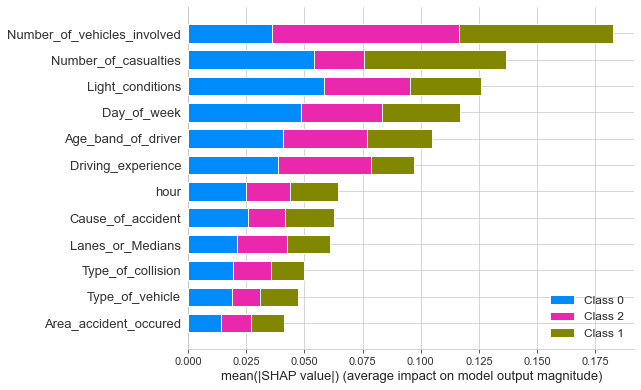

In [57]:
shap.summary_plot(shap_values, X_sample, plot_type="bar")

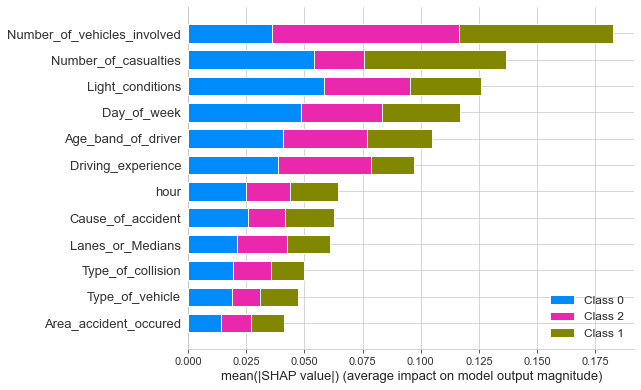

In [58]:
shap.summary_plot(shap_values, X_sample, max_display=28)

In [59]:
shap.force_plot(shap.TreeExplainer(extree_tuned).expected_value[0],
                shap_values[0][:], 
                X_sample)

In [60]:
print(y_pred_tuned[50])
shap.force_plot(shap.TreeExplainer(extree_tuned).expected_value[0], shap_values[1][50], X_sample.iloc[50])

Slight Injury


In [61]:
i=13
print(y_pred_tuned[i])
shap.force_plot(shap.TreeExplainer(extree_tuned).expected_value[0], shap_values[0][i], X_sample.values[i], feature_names = X_sample.columns)

Serious Injury


Slight Injury


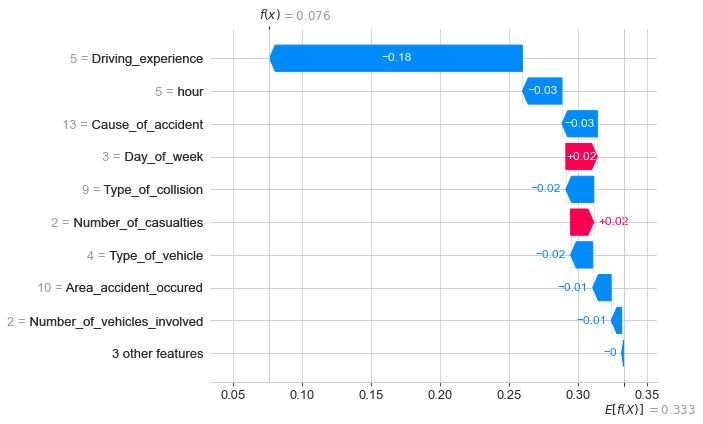

In [62]:
print(y_pred_tuned[10])
row = 10
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=shap.TreeExplainer(extree_tuned).expected_value[0], data=X_sample.iloc[row],  
                                         feature_names=X_sample.columns.tolist()))

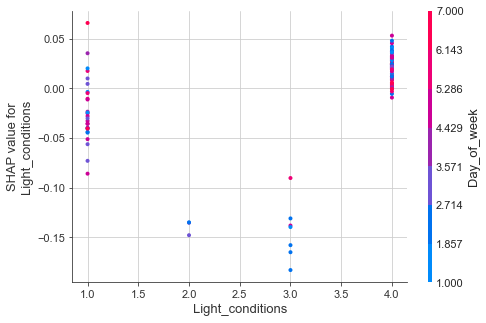

In [63]:
# Understanding Light Condition's effect
shap.dependence_plot('Light_conditions', shap_values[2], X_sample)

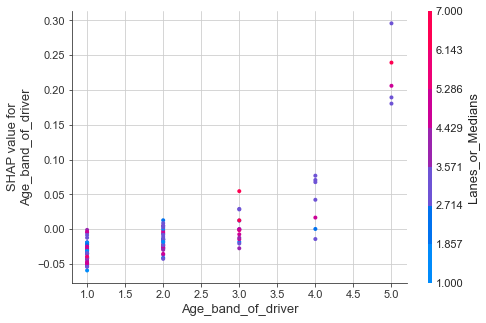

In [64]:
# Understanding Light Condition's effect
shap.dependence_plot('Age_band_of_driver', shap_values[2], X_sample)

Slight Injury


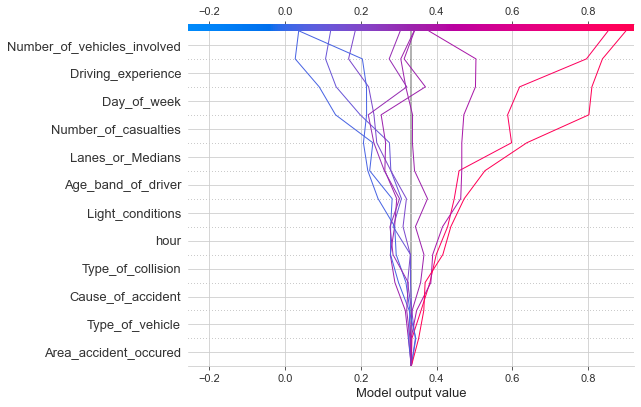

In [65]:
print(y_pred_tuned[10])
shap.decision_plot(shap.TreeExplainer(extree_tuned).expected_value[0], 
                   shap_values[2][:10], 
                   feature_names=X_sample.columns.tolist())